In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

### EDA

In [19]:
df=pd.read_csv('bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


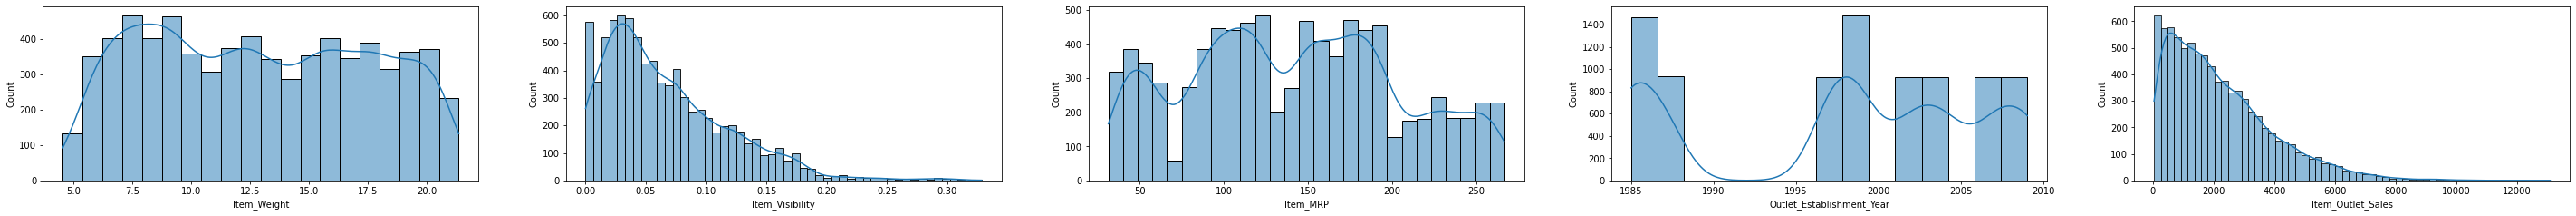

In [22]:
#Distribution, skew etc. of numerical columns
plt.figure(figsize=(50,50),facecolor='white')
plotnumber=1
n_cols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for i in n_cols:
    if plotnumber<=5:
        ax=plt.subplot(12,5,plotnumber)
        sns.histplot(x=df[i],data=df,kde=True)
    plotnumber+=1

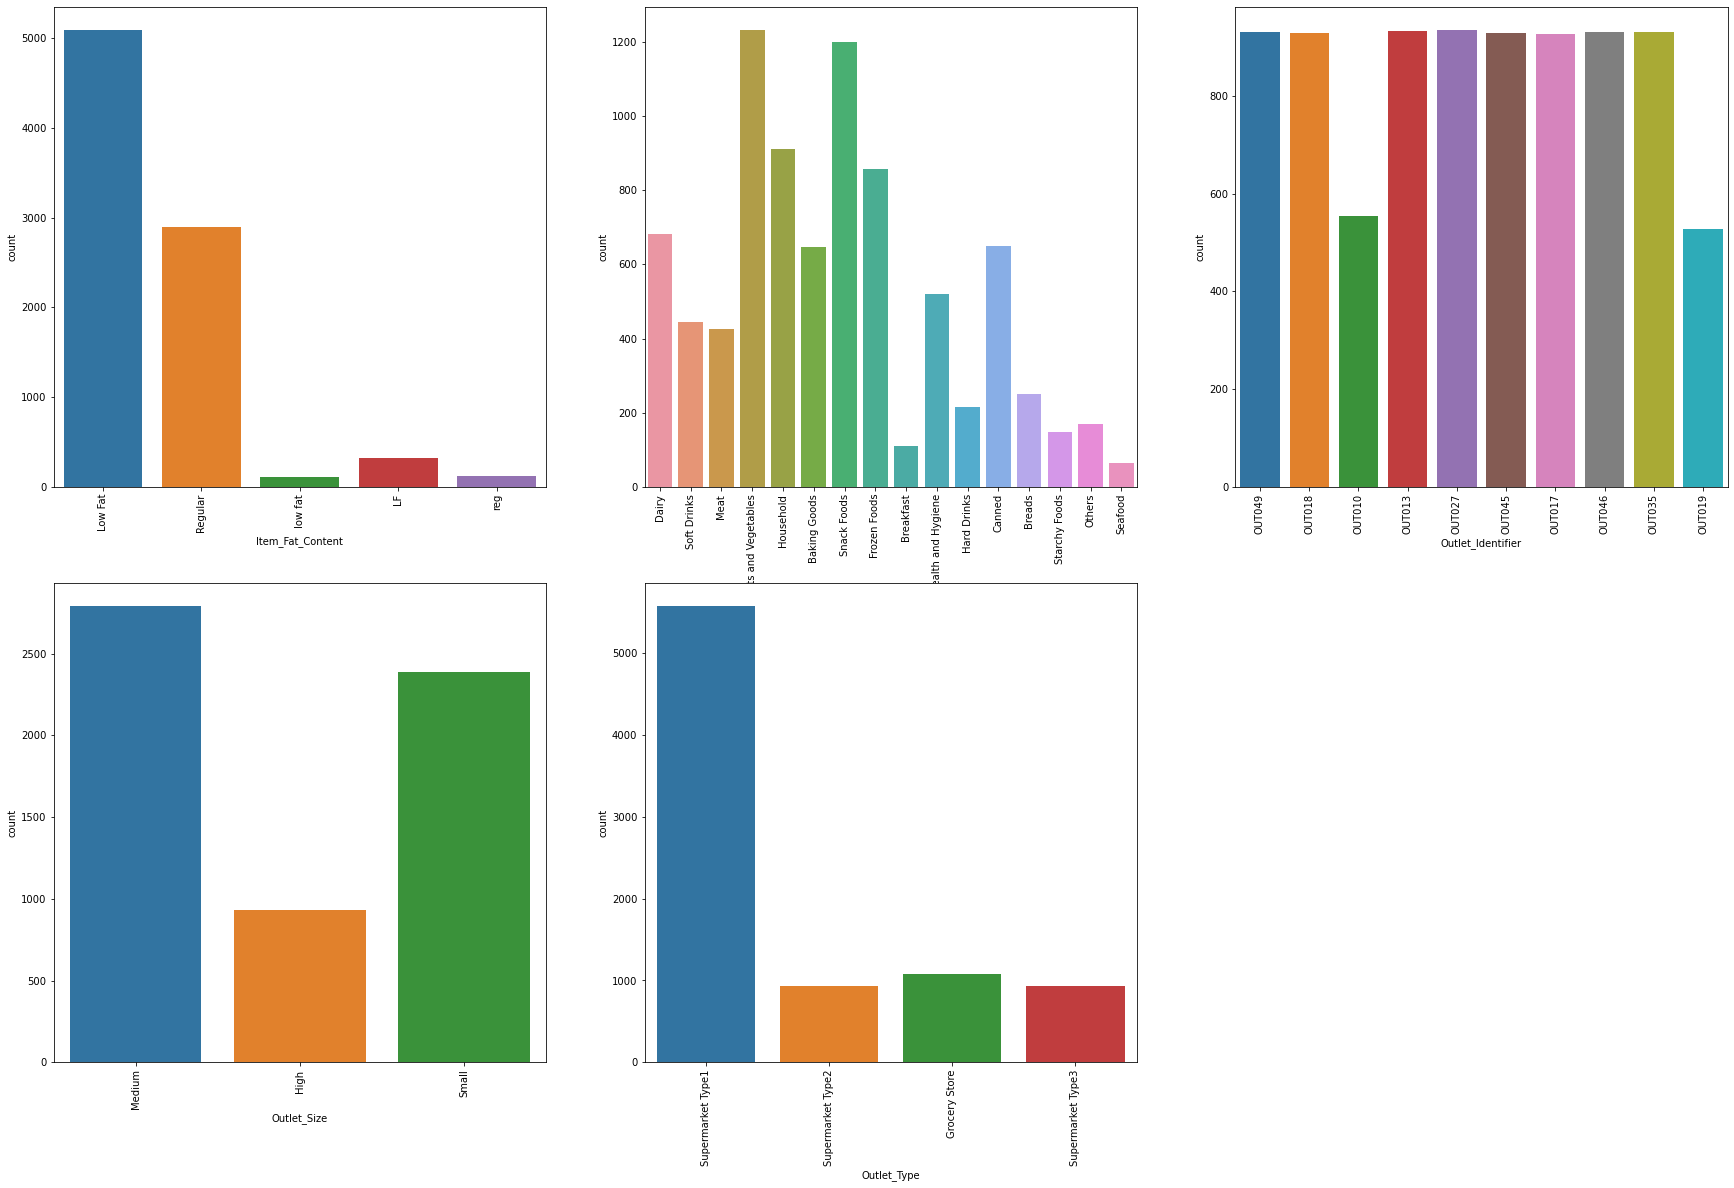

In [23]:
#Distribution, skew etc. of non-numerical columns
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
s_cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Type']
for i in s_cols:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[i],data=df)
        plt.xticks(rotation=90)
    plotnumber+=1

In [24]:
#Treating missing values
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer()
imputer2 = SimpleImputer(strategy='most_frequent')
df['Item_Weight']=imputer1.fit_transform(df['Item_Weight'].values.reshape(-1,1))[:,0]
df['Outlet_Size']=imputer2.fit_transform(df['Outlet_Size'].values.reshape(-1,1))[:,0]

In [25]:
#missing values have been treated via imputer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

<AxesSubplot:>

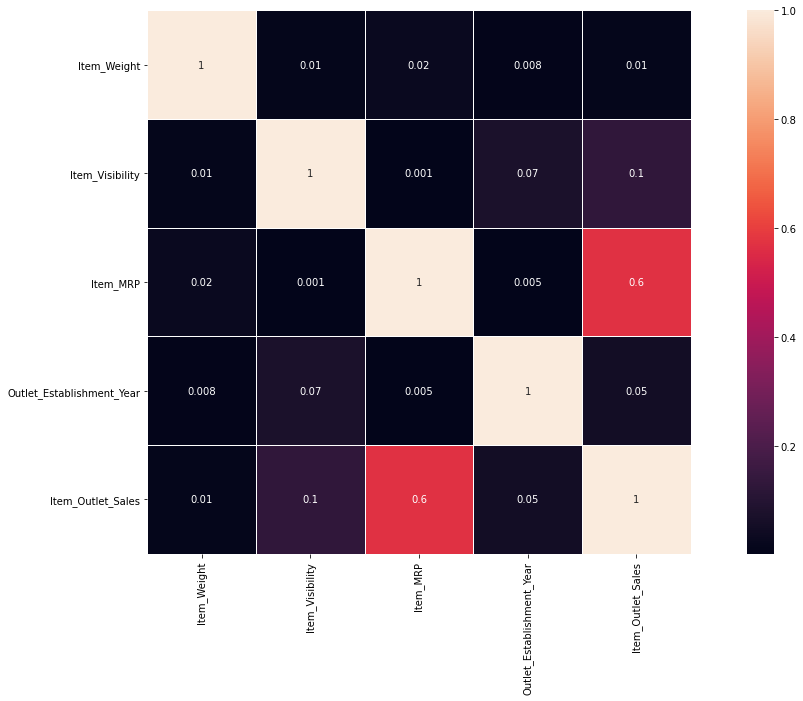

In [27]:
#Correlation plot
# Multi collinearity not present, no need to drop columns
df_corr=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

In [28]:
# Encoding non-numerical columns to numeric columns
le=LabelEncoder()
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


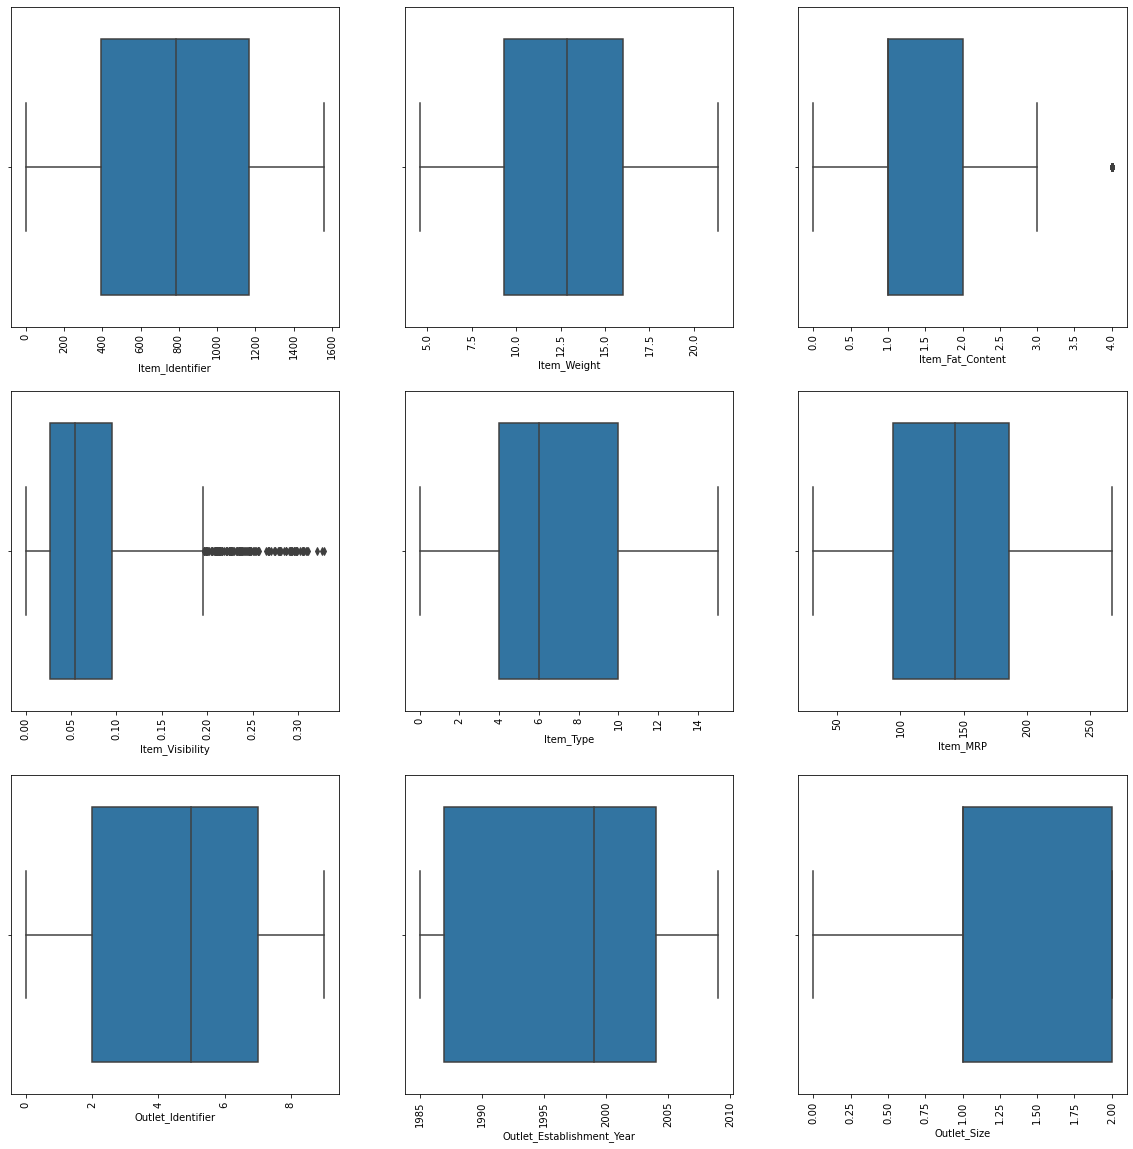

In [30]:
#Checking for outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[i],data=df)
        plt.xticks(rotation=90)
    plotnumber+=1

In [31]:
#Treating outliers using zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [32]:
df=df[(z<3).all(axis=1)]

In [33]:
df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [34]:
x=df.iloc[:,0:11]
y=df.iloc[:,-1]

### Model

In [35]:
# Finding best random state
min_squared_error = 0
max_random_state = 0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    model=XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  0


In [36]:
# List of models used and keys of scorers that can be used for scoring
en = ElasticNet()
lr = LinearRegression()
rr = Ridge()
lar = Lasso()
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=0)
ar = AdaBoostRegressor(random_state=0)
gbr= GradientBoostingRegressor(random_state=0)
sr = SVR()
lgr=LGBMRegressor(random_state=0)
xgbr = XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state = 0)

m_list= [en,lr,rr,lar,dtr,rfr,ar,gbr,sr,lgr,xgbr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [37]:
# Splitting df into train and test data. 
# I have not used the given test dataset in this project because there was enough data in training df itself
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [38]:
# Model fitting and cross-validation
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  1153.1601530944076
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -1154.9772845310804
difference between model score and cross validation score:  1.817131436672753




LinearRegression()
Root_mean_squared_error:  1123.6876529748843
cross validation scores below:--  
 LinearRegression()
root_mean_squared_error:  -1121.5603543433317
difference between model score and cross validation score:  -2.1272986315525486




Ridge()
Root_mean_squared_error:  1123.7435578152292
cross validation scores below:--  
 Ridge()
root_mean_squared_error:  -1121.5514736305704
difference between model score and cross validation score:  -2.1920841846588246




Lasso()
Root_mean_squared_error:  1124.2955177421318
cross validation scores below:--  
 Lasso()
root_mean_squared_error:  -1121.7461711876808
difference between model score and cross validation score:  -2.549346554450949




DecisionTreeRegressor(random_state=0)
Root_mean_squared_error: 

### HPT

In [55]:
# parameter grid
grid_param = {'learning_rate':[0.0001,0.001,0.01,0.1],
              'n_estimators':[100,200,300,400,500],
              'max_features':['auto','log2','sqrt'],
              'max_depth':[int(x) for x in np.linspace(5, 30, num = 4)]
             }

In [56]:
# HPT using GridSearchCV
grid_search=GridSearchCV(GradientBoostingRegressor(random_state=0),param_grid=grid_param,cv=5,n_jobs=-1,verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [5, 13, 21, 30],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [57]:
# Best parameters
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [59]:
# Fitting model with best params
m = GradientBoostingRegressor(random_state=0,max_depth=5,max_features='log2',n_estimators=500,learning_rate=0.01)
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='log2',
                          n_estimators=500, random_state=0)
Root_mean_squared_error:  1028.9529046163902
cross validation scores below:--  
 GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='log2',
                          n_estimators=500, random_state=0)
root_mean_squared_error:  -1020.3504538281022


### Model Saving

In [60]:
import joblib

joblib.dump(m,'BDMSP_best.obj')

['BDMSP_best.obj']

In [61]:
joblib.load('BDMSP_best.obj')

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='log2',
                          n_estimators=500, random_state=0)